In [1]:
 !git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [2]:
# Step 1: Import the drive module
from google.colab import drive

# Step 2: Mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

print(os.listdir('/content/drive/My Drive'))

['Transcript_ShaibalDas (1).pdf', 'Transcript_ShaibalDas.pdf', 'Grade book.gsheet', 'Assignment3.m', 'Shaibal_Das.pdf', '1667337515804.jpg', 'ME-3322 Grading.gsheet', 'Shaibal_Das_Resume (1).pdf', 'Shaibal_Das_Resume.pdf', 'CERE Small Grant Proposal_Taher Deemyad_2022.docx', 'ShaibalDas20221042SBCD (2).pdf', 'Main GNSS antenna of rover.jpg', 'GPS-Guided Autonomous Robot with Obstacle Avoidance.docx', 'Mechatronics Project', 'Mechatronics Report (Berry and Das).docx', 'A Ground Control Station for a Multi-UAV Surveillance System.gdoc', 'Documents', 'May eStatement.pdf', 'SKB06858.jpeg', 'Summer worksheet-Shaibal Das.gdoc', 'New Microsoft PowerPoint Presentation.pptx', '158250267309.jpeg', '2', 'GTA Acceptance (1).pdf', 'BSA', 'Colab Notebooks', 'members list.pdf', 'Shaibal_Das_CV (1).pdf', 'Robot Training Modules', 'Drone Detection using YOLOv8.pptx', 'Pitha Party .gsheet', 'GTA Acceptance.pdf', 'Shaibal_Das_CV.pdf', 'Academic Transcript-ISU.pdf', 'Professors_ML_Bioinformatics_CV_NLP_Se

In [4]:
#file_path = '/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Cloudy/images/train'

In [5]:
ls /content

drive/  sample_data/  yolov5/


In [6]:
!python train.py --img 640 --batch 16 --epochs 100 --data '/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/drone1.yaml' --weights yolov5s.pt

2024-05-29 23:54:27.850320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-29 23:54:27.850385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-29 23:54:27.852359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/drone1.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weight

In [7]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test/DJI_FPV_Sunny (961).jpg'

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test/DJI_FPV_Sunny (961).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-317-g00403794 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test/DJI_FPV_Sunny (961).jpg: 640x384 1 drone, 104.1ms
Speed: 0.7ms pre-process, 104.1ms inference, 594.5ms NMS per image at shape (1, 3, 6

Displaying: runs/detect/exp/DJI_FPV_Sunny (961).jpg


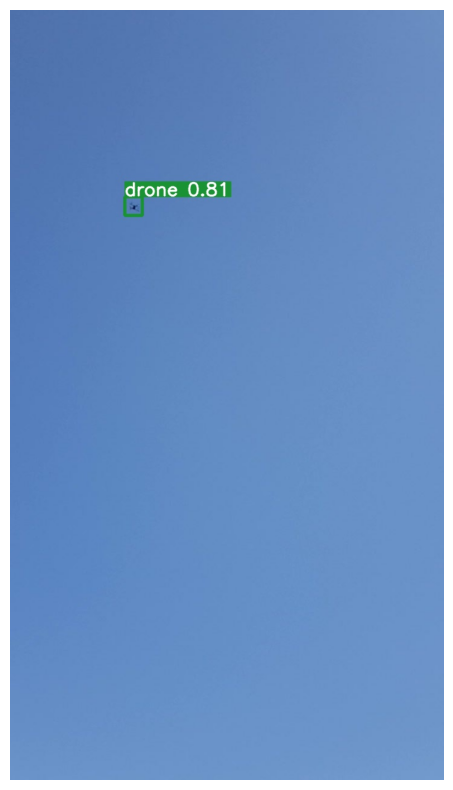

In [8]:
import cv2
import matplotlib.pyplot as plt
import os

# Path to the folder where detection results are saved
results_folder = 'runs/detect/exp'  # Update this if your results are saved in a different folder

# List all images in the results folder
detected_images = [os.path.join(results_folder, img) for img in os.listdir(results_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Function to display an image
def display_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display all detected images
for img_path in detected_images:
    print(f"Displaying: {img_path}")
    display_image(img_path)


## Automating Detection and Displaying

In [9]:
# Step 4: Run detection on all images in the validation set
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test' --save-txt --save-conf --save-crop

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_csv=False, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-317-g00403794 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
Model summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/240 /content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test/DJI_FPV_Sunny (1000).jpg: 640x384 1 drone, 112.9ms
image 2/240 /content/drive/My Drive/DroneDatasets/EditedDJIFPV_Sunny/images/test/DJI_FPV_Sunny (1001).jpg: 6

Displaying: runs/detect/exp2/DJI_FPV_Sunny (962).jpg


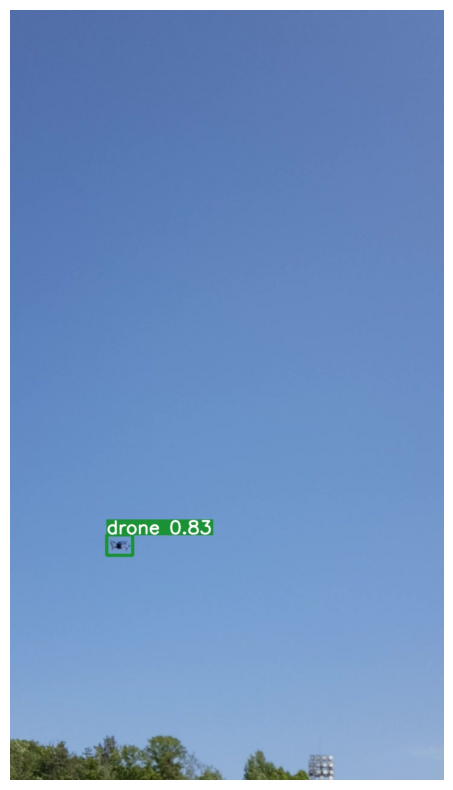

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1012).jpg


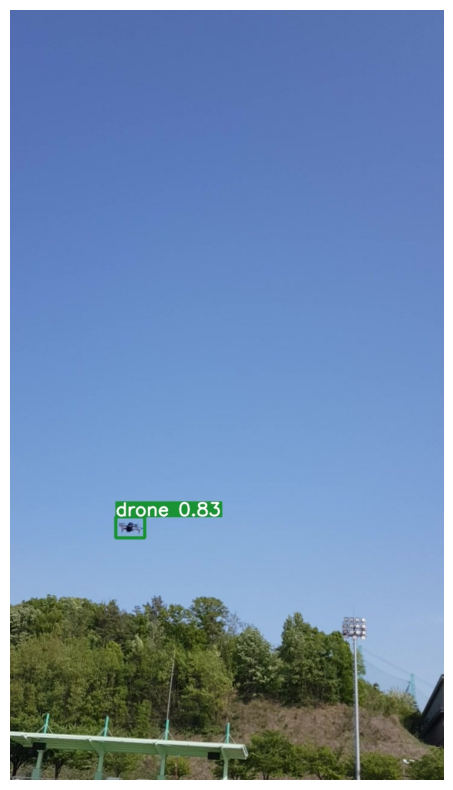

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1170).jpg


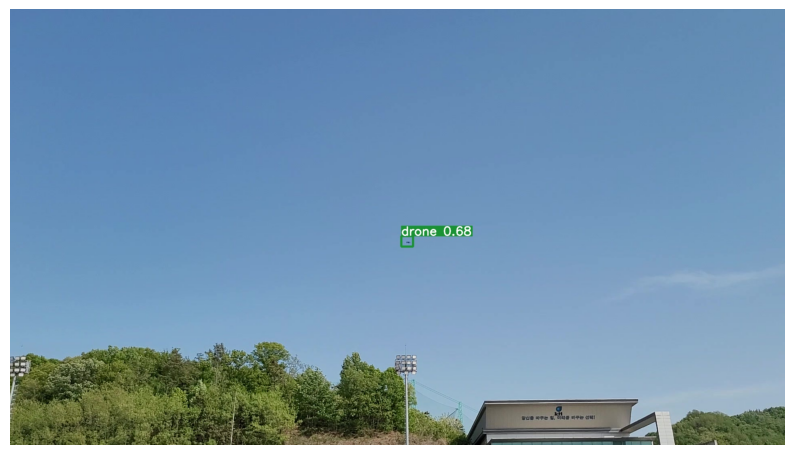

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1017).jpg


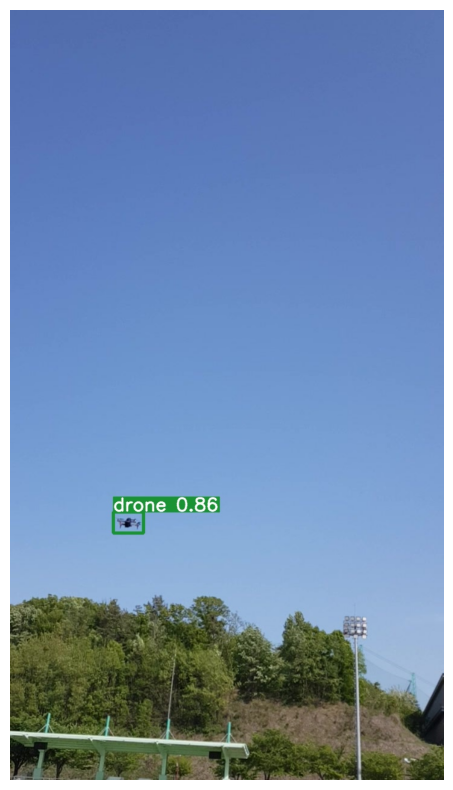

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1034).jpg


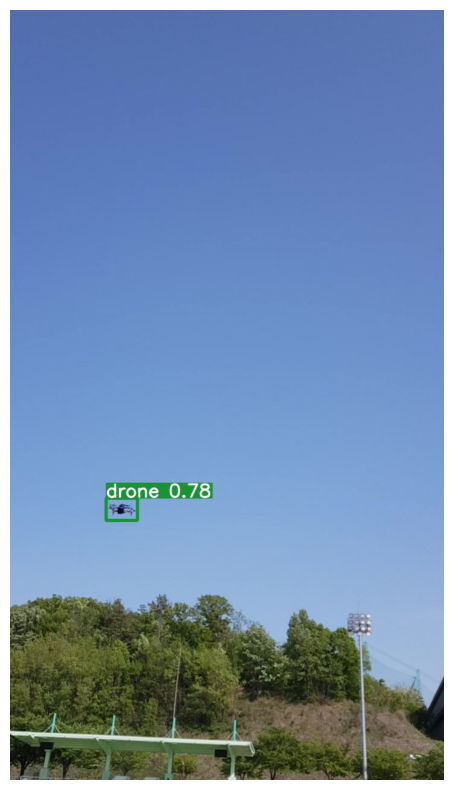

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1062).jpg


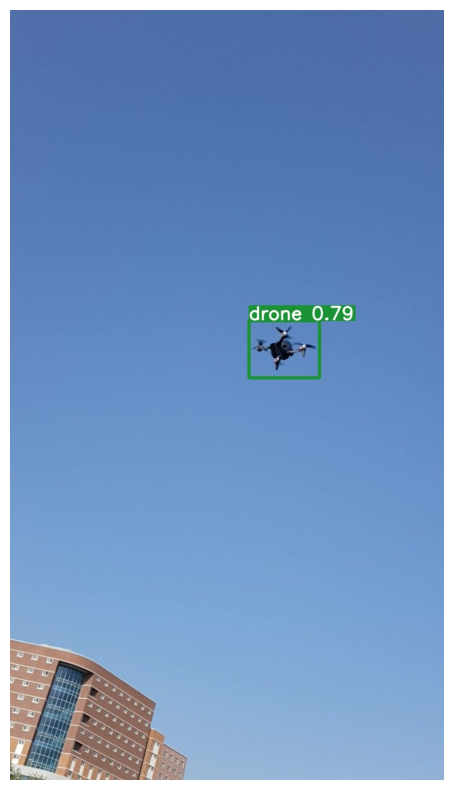

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1021).jpg


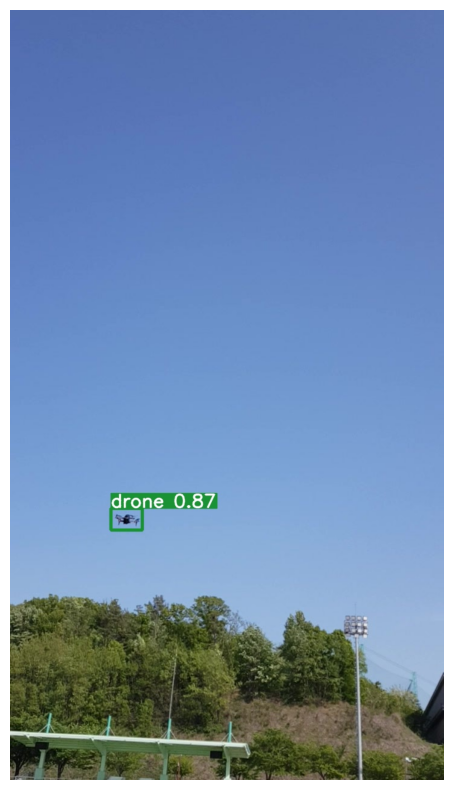

Displaying: runs/detect/exp2/DJI_FPV_Sunny (981).jpg


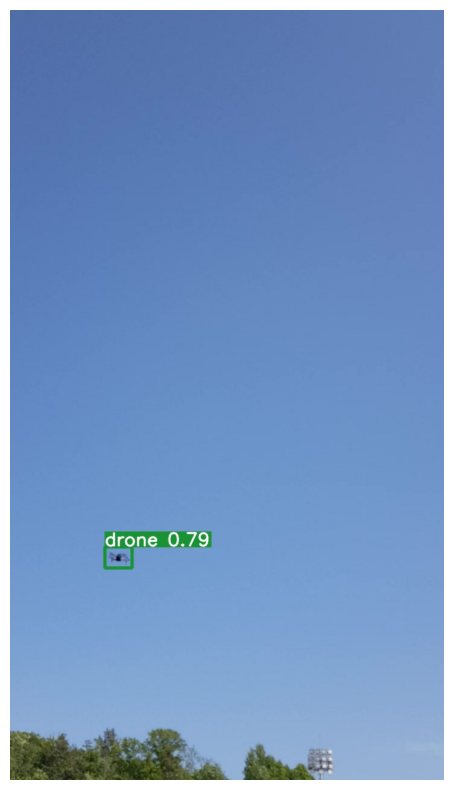

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1002).jpg


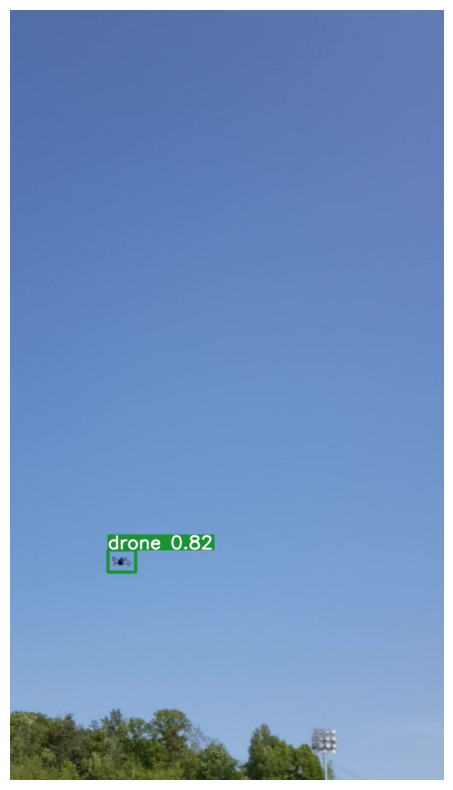

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1047).jpg


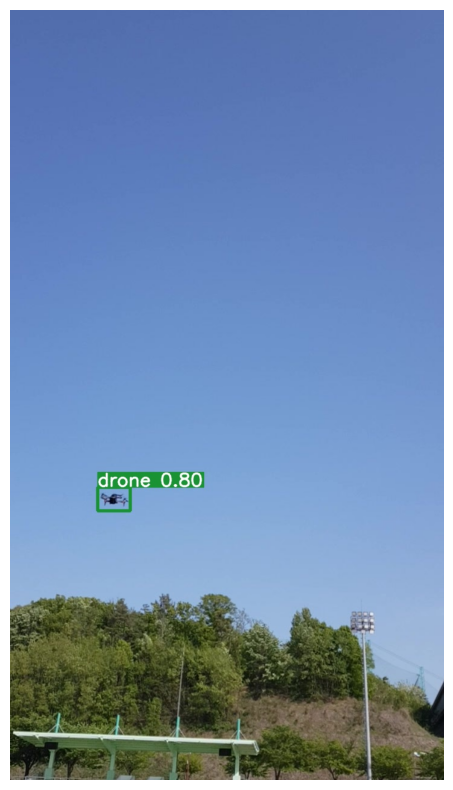

Displaying: runs/detect/exp2/DJI_FPV_Sunny (986).jpg


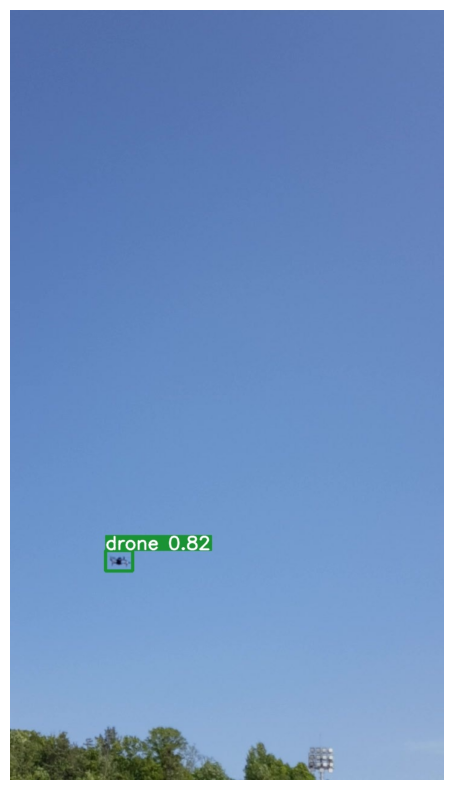

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1025).jpg


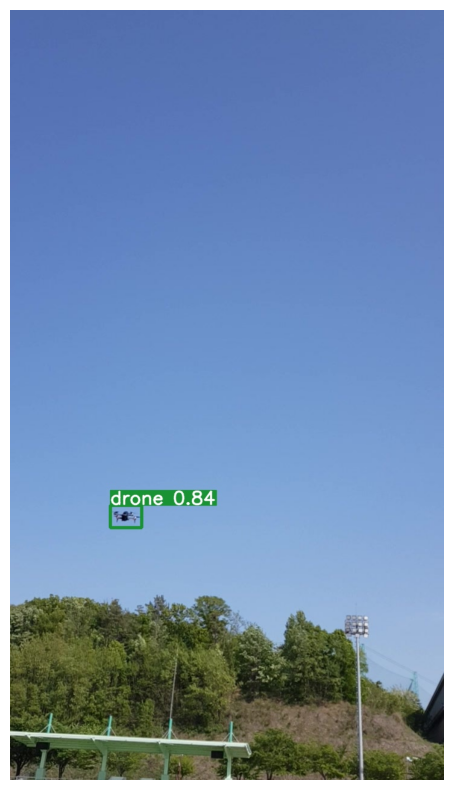

Displaying: runs/detect/exp2/DJI_FPV_Sunny (970).jpg


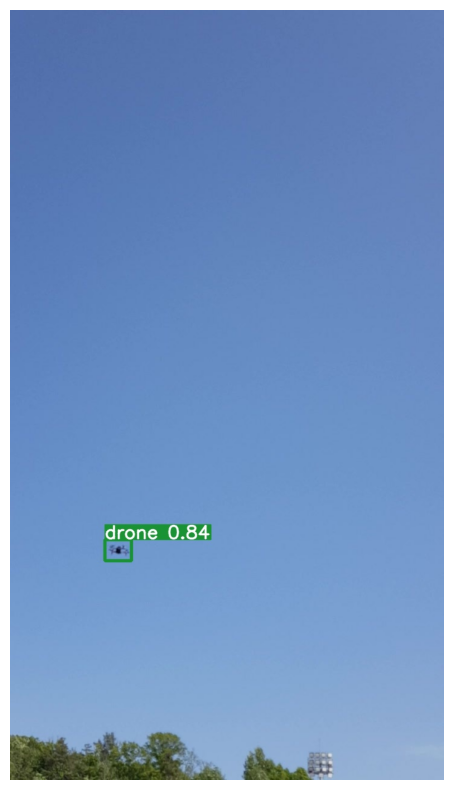

Displaying: runs/detect/exp2/DJI_FPV_Sunny (966).jpg


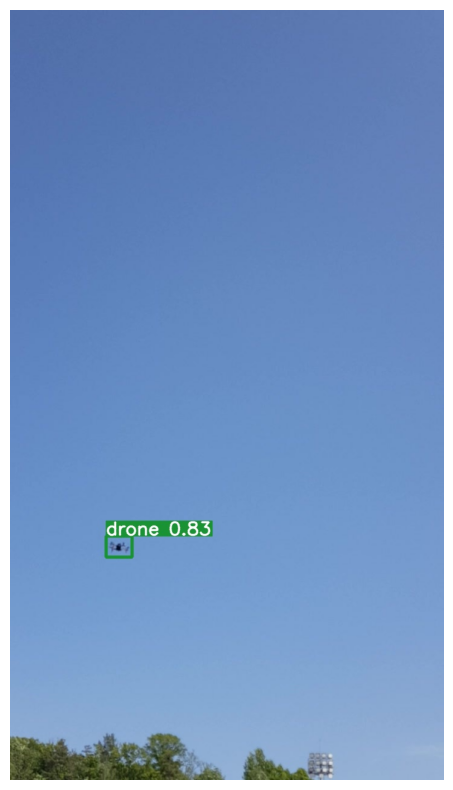

Displaying: runs/detect/exp2/DJI_FPV_Sunny (995).jpg


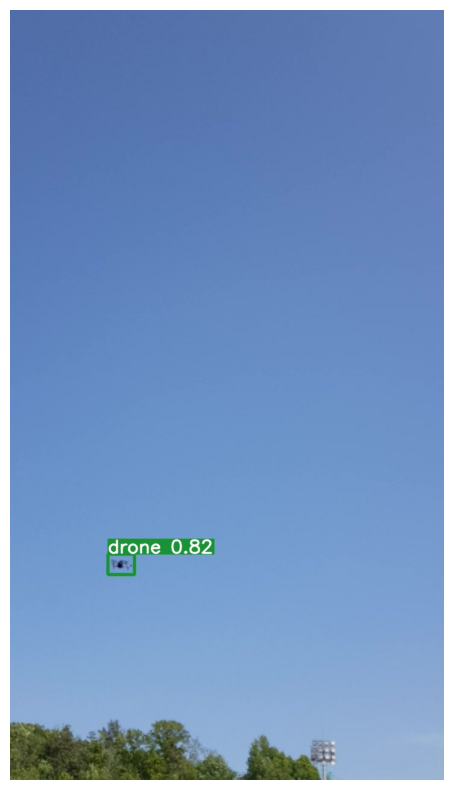

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1168).jpg


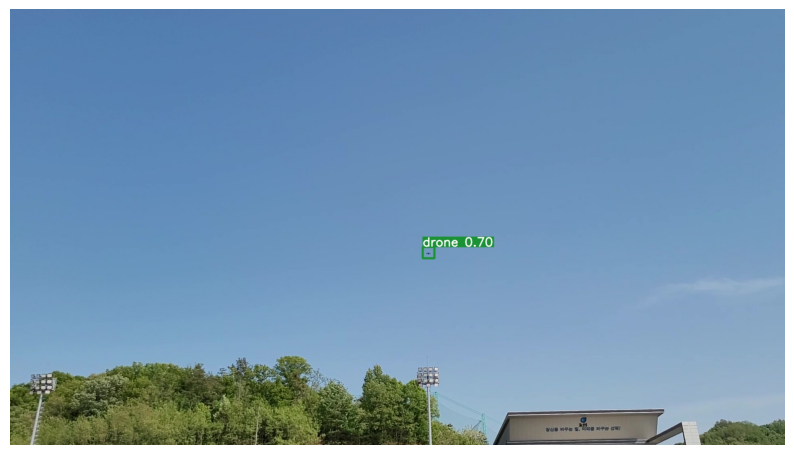

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1113).jpg


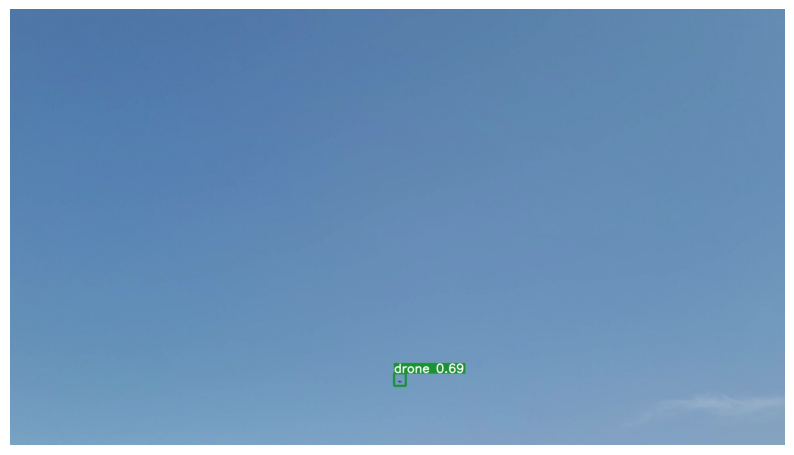

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1010).jpg


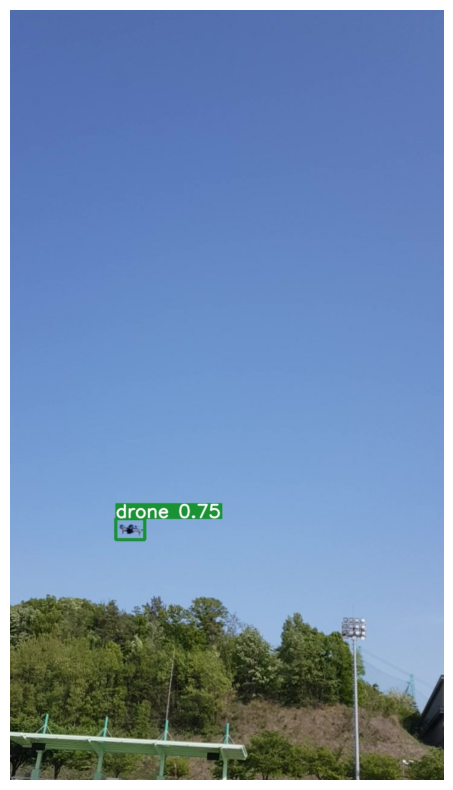

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1095).jpg


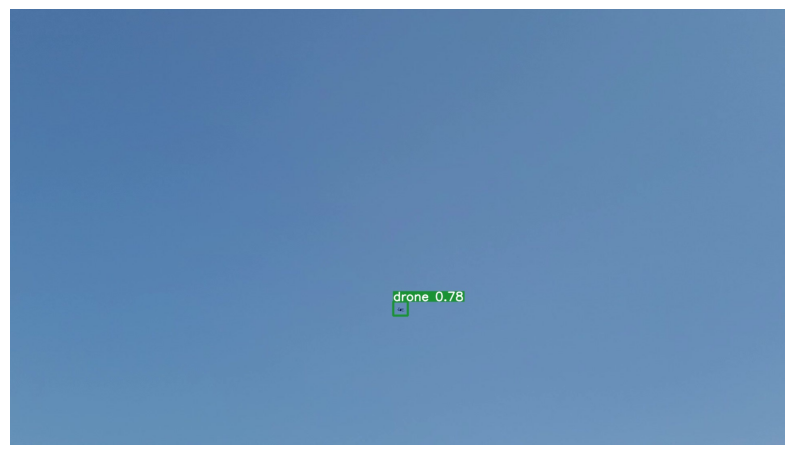

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1136).jpg


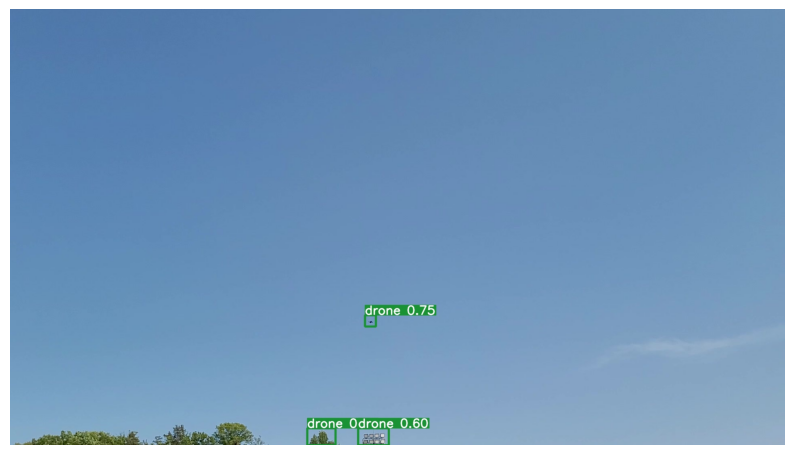

Displaying: runs/detect/exp2/DJI_FPV_Sunny (984).jpg


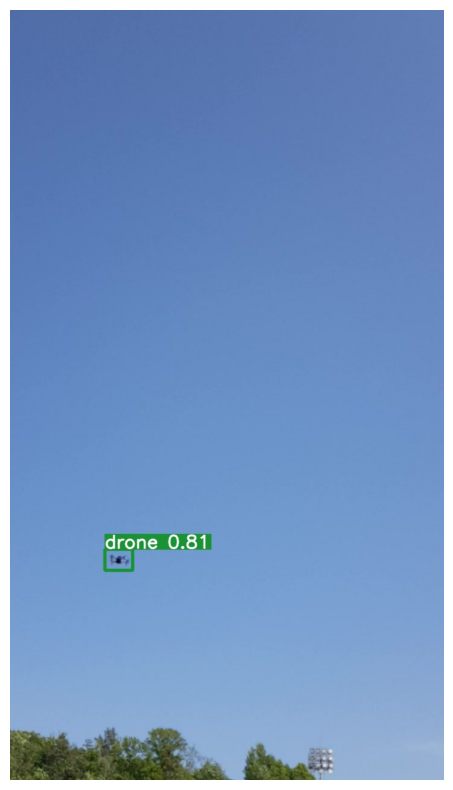

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1011).jpg


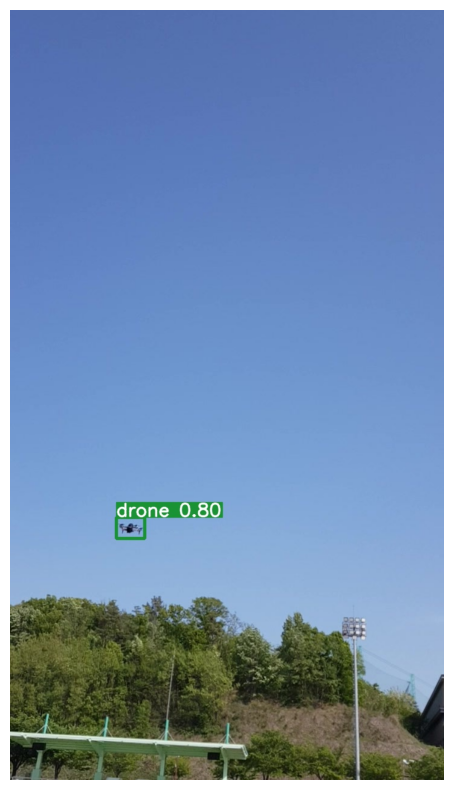

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1148).jpg


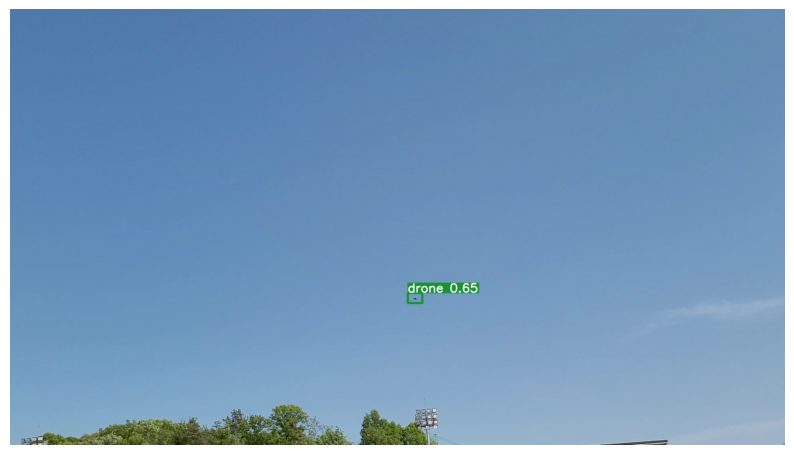

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1158).jpg


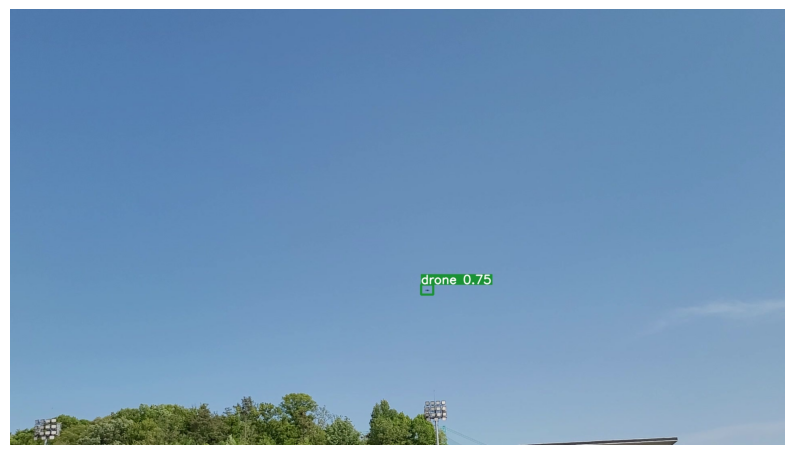

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1005).jpg


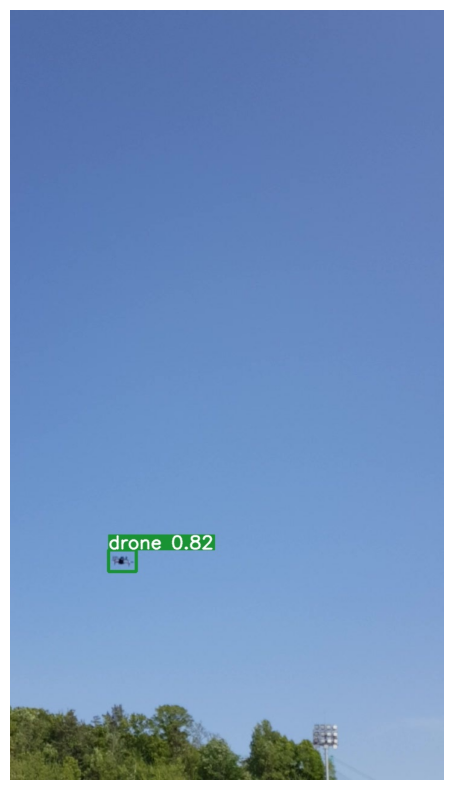

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1153).jpg


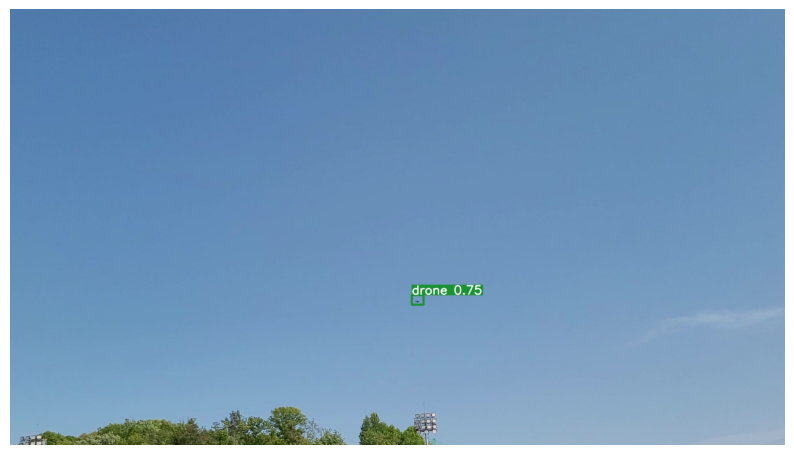

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1102).jpg


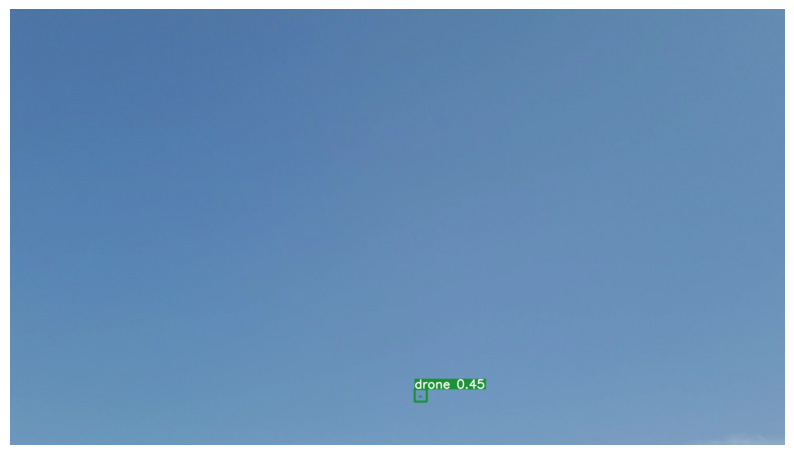

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1189).jpg


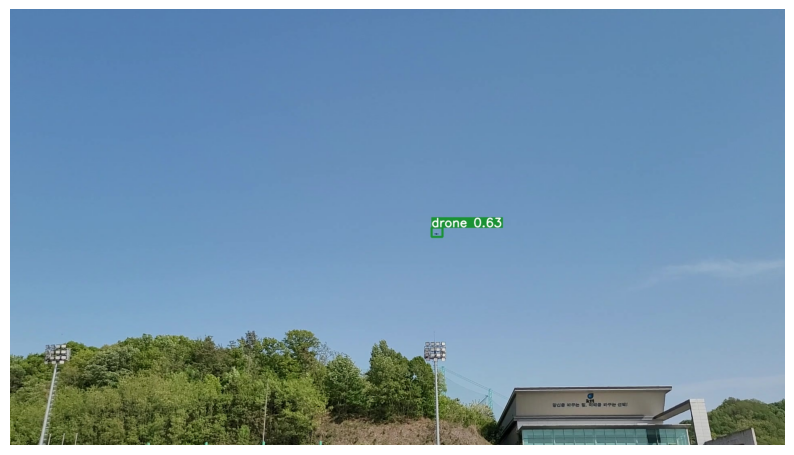

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1128).jpg


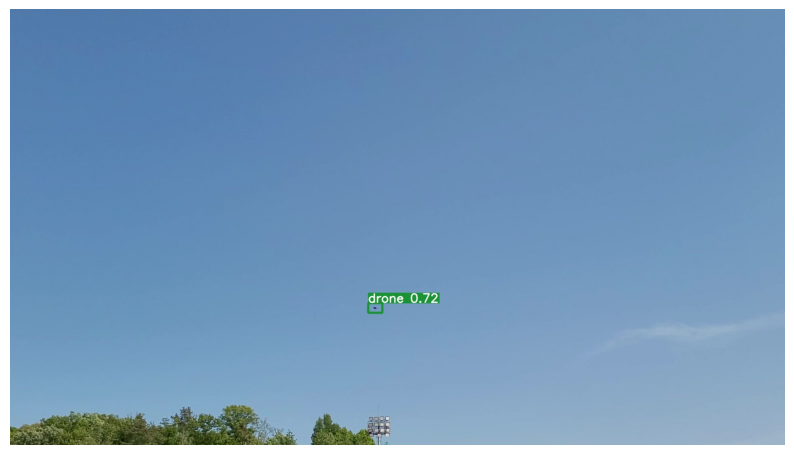

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1131).jpg


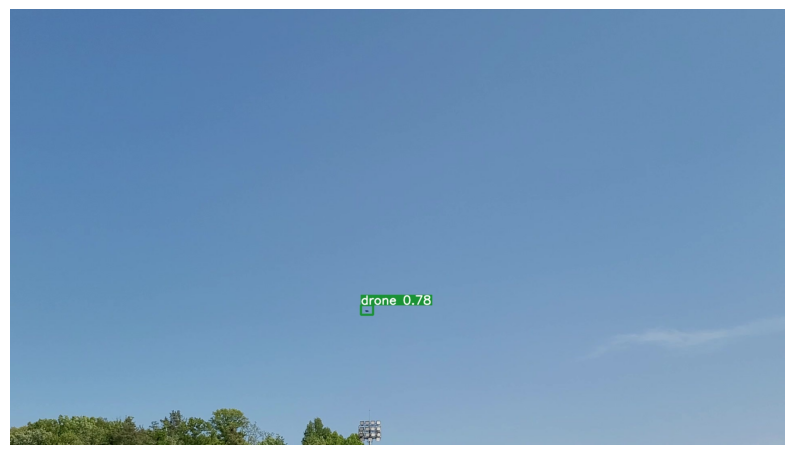

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1166).jpg


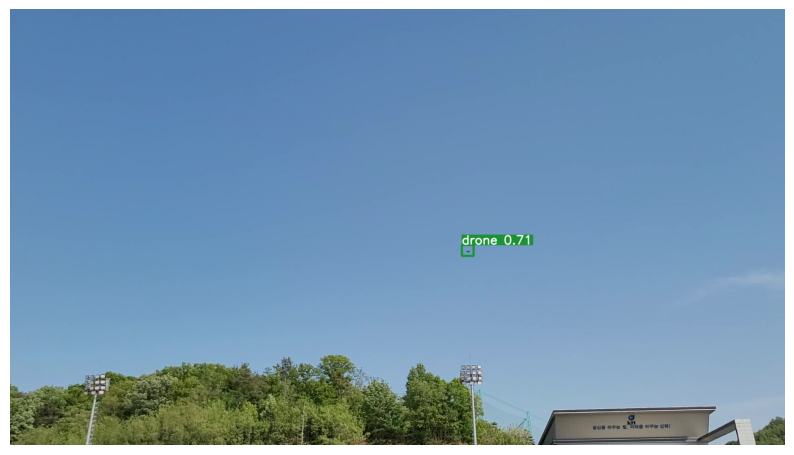

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1135).jpg


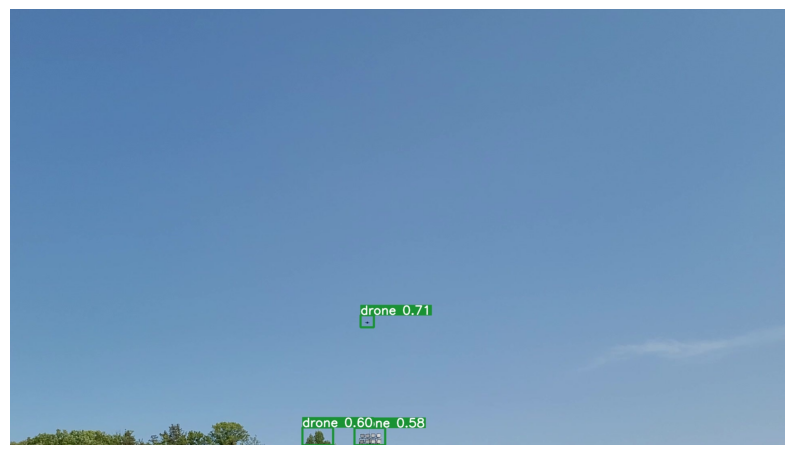

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1146).jpg


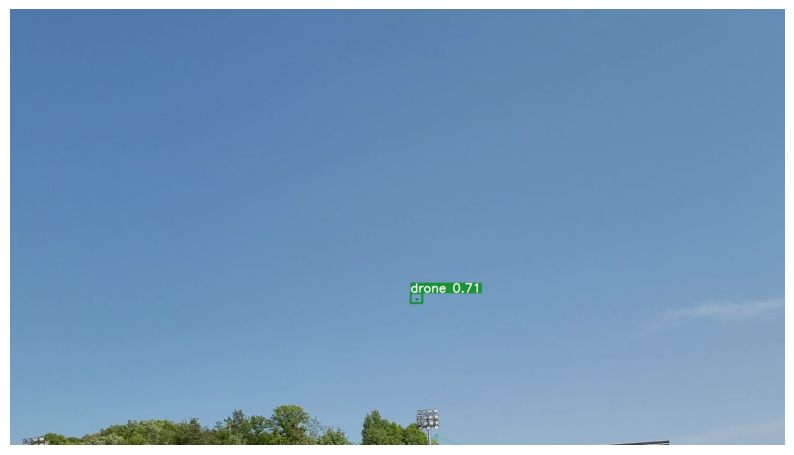

Displaying: runs/detect/exp2/DJI_FPV_Sunny (1154).jpg


In [ ]:
# Step 5: Display the detection results
import cv2
import matplotlib.pyplot as plt
import os

# Path to the folder where detection results are saved
results_folder = 'runs/detect/exp2'  # Update this if your results are saved in a different folder

# List all images in the results folder
detected_images = [os.path.join(results_folder, img) for img in os.listdir(results_folder) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Function to display an image with detections
def display_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Display all detected images
for img_path in detected_images:
    print(f"Displaying: {img_path}")
    display_image(img_path)